In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
car_df= pd.read_csv("C:\data\car_data.csv")
car_df.shape

(6019, 13)

In [3]:
car_df= car_df.drop(['Name', 'Unnamed: 1'], axis=1)
car_df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
print(car_df.dtypes)

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object


In [5]:
car_df['Power'] = car_df['Power'].astype(float)

In [6]:
car_df.isnull().sum()

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

<AxesSubplot:ylabel='Density'>

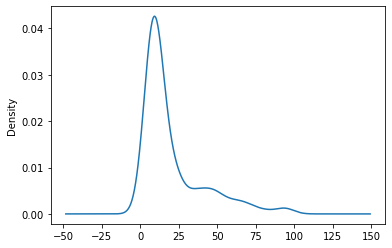

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
car_df['New_Price'].plot(kind='kde', ax=ax)

In [8]:
car_df['Power']= car_df['Power'].fillna(car_df['Power'].median())
car_df['New_Price']= car_df['New_Price'].fillna(car_df['New_Price'].median())
car_df['Engine']= car_df['Engine'].fillna(car_df['Engine'].median())
car_df['Seats']= car_df['Seats'].fillna(car_df['Seats'].mean())
car_df['Mileage']= car_df['Mileage'].fillna(car_df['Mileage'].mean())

<AxesSubplot:ylabel='Density'>

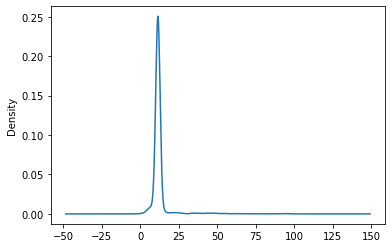

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
car_df['New_Price'].plot(kind='kde', ax=ax)
#df._median.plot(kind='kde', ax=ax, color='red')

In [10]:
car_df= pd.get_dummies(car_df)
car_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,11.415,1.75,1,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,11.415,12.50,0,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,8.610,4.50,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,11.415,6.00,0,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,11.415,17.74,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,7.880,4.75,0,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,11.415,4.00,0,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,11.415,2.90,0,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,11.415,2.65,0,0,0,0,1,0,1,1,0,0,0


<AxesSubplot:>

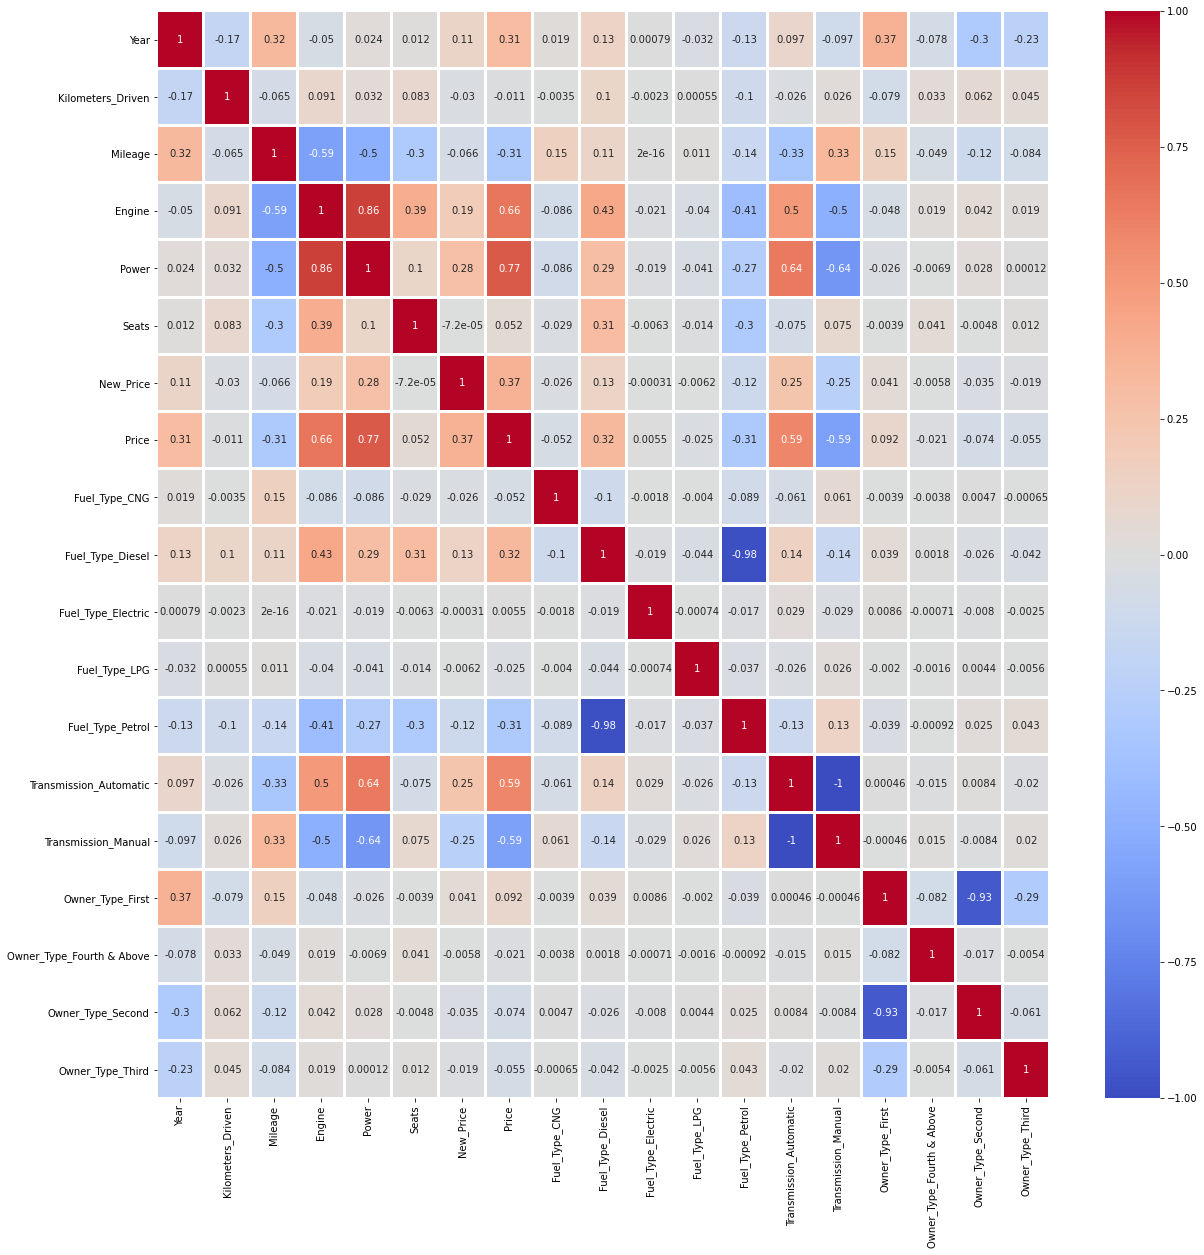

In [11]:
plt.figure(figsize= (20, 20))
sns.heatmap(car_df.corr(), annot= True, cmap='coolwarm', linewidths=2)

In [12]:
x= car_df.drop(['Price'], axis=1)
x.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,11.415,1,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,11.415,0,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,8.610,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,11.415,0,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,11.415,0,1,0,0,0,1,0,0,0,1,0


In [13]:
y= car_df['Price']
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=5)

In [15]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc= sc.transform(x_test)
x_test_sc

array([[ 0.20037194,  0.25772994,  1.67675156, ..., -0.03532224,
        -0.43393787, -0.13485423],
       [-1.02670711, -0.11936266, -1.16478321, ..., -0.03532224,
         2.30447738, -0.13485423],
       [ 0.81391147, -0.24947397,  2.17729884, ..., -0.03532224,
        -0.43393787, -0.13485423],
       ...,
       [ 0.20037194,  0.44111683,  2.24505852, ..., -0.03532224,
         2.30447738, -0.13485423],
       [-0.41316758, -0.17311865, -0.72106663, ..., -0.03532224,
         2.30447738, -0.13485423],
       [-0.10639782, -0.10481021, -0.2467489 , ..., -0.03532224,
         2.30447738, -0.13485423]])

In [17]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train_sc, y_train)
lr.predict(x_test_sc)
lr.score(x_test_sc, y_test)

0.7156619310549976

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr= SVR()
svr.fit(x_train_sc, y_train)
pred= svr.predict(x_test_sc)
score_train =r2_score(y_test, pred)
score_train

0.744722280373313

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
reg = RandomForestRegressor(criterion='mse')
reg =RandomForestRegressor(criterion='mse', max_depth=13, n_estimators=20)
reg.fit(x_train_sc , y_train)
reg.score(x_train_sc, y_train)

0.9793051994184387

In [20]:
params = {'max_depth':[11,12,13,14,15], 'n_estimators':[30,50]}
gscv = GridSearchCV(reg, params, cv=5, scoring='neg_mean_squared_log_error')
gscv.fit(x_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=13, n_estimators=20),
             param_grid={'max_depth': [11, 12, 13, 14, 15],
                         'n_estimators': [30, 50]},
             scoring='neg_mean_squared_log_error')

In [21]:
p = reg.predict(x_test_sc)

In [22]:
p

array([5.01363046, 7.35910588, 8.0116819 , ..., 4.3364141 , 5.51912807,
       3.84570717])